<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
df[['ConvertedComp']].describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


In [4]:
'''Series.value_counts(normalize=False,  # 是否显示占比
                    sort=True,   # 是否排序
                    ascending=False,  # 默认降序
                    bins=None,  # 分区
                    dropna=True) # 是否删除空缺值''' 
df['ConvertedComp'].value_counts(dropna='Flase')

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
            ... 
79183.0        1
20475.0        1
288732.0       1
22056.0        1
19880.0        1
Name: ConvertedComp, Length: 3515, dtype: int64

d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

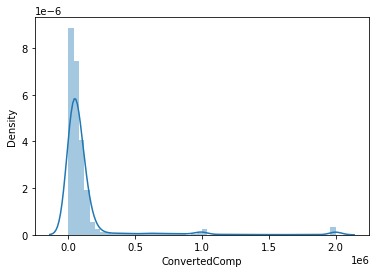

In [5]:
# your code goes here
# seaborn查看单变量分布情况最方便:使用distplot()函数直方图，并且做一个核密度估计（KDE）
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.distplot(df['ConvertedComp'])

Plot the histogram for the column `ConvertedComp`.


d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


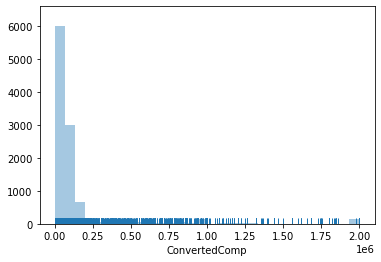

In [6]:
# your code goes here
# matplotlib中也有一个hist()函数来绘制直方图,去掉密度曲线，并且加一个“地毯图”（rugplot）。地毯图会在每个观测值的位置添加一个垂直的线段小标记。
sns.distplot(df['ConvertedComp'], bins=30, kde=False, rug=True);

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [8]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [10]:
len(df[df['Gender']=='Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
df['ConvertedComp'].value_counts()

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
            ... 
79183.0        1
20475.0        1
288732.0       1
22056.0        1
19880.0        1
Name: ConvertedComp, Length: 3515, dtype: int64

Text(0, 0.5, 'Number of every bin')

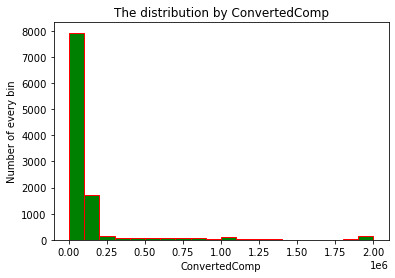

In [28]:
# your code goes here
plt.hist(df['ConvertedComp'], bins=20, color='green', edgecolor='red')
plt.title('The distribution by ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Number of every bin')

In [12]:
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0, 0.5, 'Number of every bin')

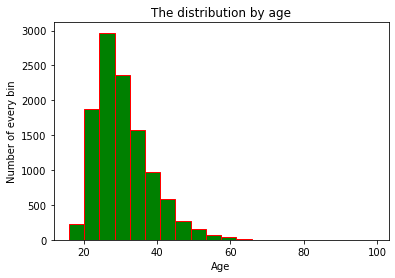

In [27]:
# your code goes here
plt.hist(df['Age'], bins=20, color='green', edgecolor='red')
plt.title('The distribution by age')
plt.xlabel('Age')
plt.ylabel('Number of every bin')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'The compensation distribution (by US dolar)')

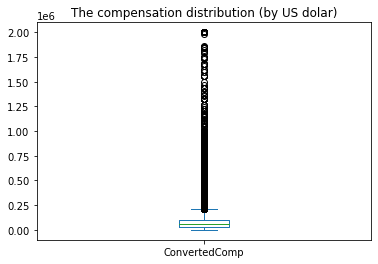

In [36]:
df['ConvertedComp'].plot(kind='box')
plt.title('The compensation distribution (by US dolar)')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
IQR = q3 - q1
IQR

73132.0

In [17]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [18]:
df[df['ConvertedComp'].isna()][['ConvertedComp']]

,ConvertedComp
35,NaN
50,NaN
56,NaN
79,NaN
102,NaN
...,...
11365,NaN
11370,NaN
11377,NaN
11380,NaN


In [19]:
df_1 = df[df['ConvertedComp'] < q3+1.5*IQR] 
df_1['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

<AxesSubplot:>

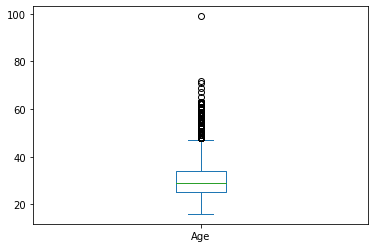

In [20]:
df_1['Age'].plot(kind='box')

In [21]:
df_1['Age'].quantile(0.25)

25.0

In [22]:
len(df_1[df_1['Age'] <25 ])

1804

In [23]:
len(df_1[df_1['Age'].isna()])

210

Text(0.5, 1.0, 'The distribution by age after removing outliers')

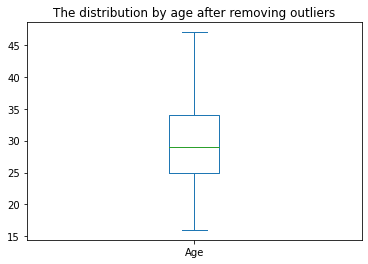

In [30]:
df_1['Age']
df_2 = df_1[df_1['Age'] < df_1['Age'].quantile(0.75)+1.5*(df_1['Age'].quantile(0.75)-df_1['Age'].quantile(0.25))]
df_2['Age'].plot(kind='box')
plt.title('The distribution by age after removing outliers')

In [41]:
len(df)

11398

In [42]:
len(df[(df['Age'] > 22) & (df['Age'] < 35) ])

7475

Find out the upper and lower bounds.


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
# your code goes here
len(df[df['ConvertedComp'] > q3+1.5*IQR])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [31]:
# your code goes here
df1 = df[(df['ConvertedComp'] > q1- 1.5*IQR) & (df['ConvertedComp'] < q3+1.5*IQR)] 
df1.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


Text(0.5, 1.0, 'The compensation distribution (by US dolar) after removing outliers')

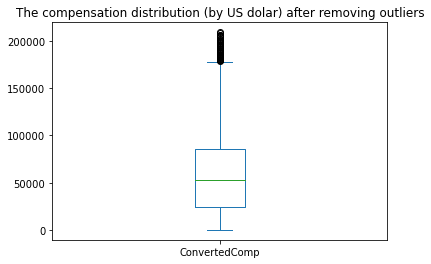

In [37]:
df_1['ConvertedComp'].plot(kind='box')
plt.title('The compensation distribution (by US dolar) after removing outliers')

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
# your code goes here
# Select only the numerical columns
numerical_cols = df1.select_dtypes(include=[np.number]).columns

# Create the correlation matrix
corr_matrix = df1[numerical_cols].corr()

# Select the correlation values for the "Age" column
age_corr_values = corr_matrix['Age']

# Print the correlation values for the Age column with all other numerical columns
print(age_corr_values)

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


In [40]:
df1[numerical_cols].corr()['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'correlation between Age and all other numerical columns')

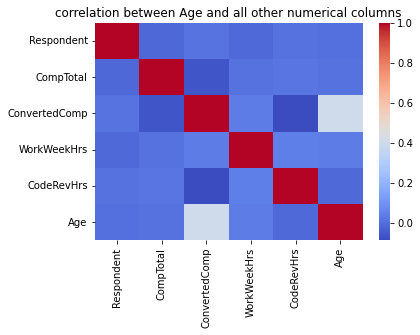

In [39]:
import seaborn as sns


# 画相关性热力图
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('correlation between Age and all other numerical columns')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
